# Importing Dependencies

In [1]:
import os
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Preparation

In [ ]:
df = pd.read_csv(os.getcwd() + "/drive/MyDrive/rpa-billing-result_100k_2021_01_01.csv")

In [ ]:
df

In [ ]:
df = df[["number", "gladius.paketradius",
         "billing_11_period", "billing_11_amountTotal", "billing_11_status", "billing_11_paymentDate", "billing_11_paymentTime", "billing_11_channel",
         "billing_10_period", "billing_10_amountTotal", "billing_10_status", "billing_10_paymentDate", "billing_10_paymentTime", "billing_10_channel",
         "billing_9_period", "billing_9_amountTotal", "billing_9_status", "billing_9_paymentDate", "billing_9_paymentTime", "billing_9_channel",
         "billing_8_period", "billing_8_amountTotal", "billing_8_status", "billing_8_paymentDate", "billing_8_paymentTime", "billing_8_channel",
         "billing_7_period", "billing_7_amountTotal", "billing_7_status", "billing_7_paymentDate", "billing_7_paymentTime", "billing_7_channel",
         "billing_6_period", "billing_6_amountTotal", "billing_6_status", "billing_6_paymentDate", "billing_6_paymentTime", "billing_6_channel",
         "billing_5_period", "billing_5_amountTotal", "billing_5_status", "billing_5_paymentDate", "billing_5_paymentTime", "billing_5_channel",
         "billing_4_period", "billing_4_amountTotal", "billing_4_status", "billing_4_paymentDate", "billing_4_paymentTime", "billing_4_channel",
         "billing_3_period", "billing_3_amountTotal", "billing_3_status", "billing_3_paymentDate", "billing_3_paymentTime", "billing_3_channel",
         "billing_2_period", "billing_2_amountTotal", "billing_2_status", "billing_2_paymentDate", "billing_2_paymentTime", "billing_2_channel",
         "billing_1_period", "billing_1_amountTotal", "billing_1_status", "billing_1_paymentDate", "billing_1_paymentTime", "billing_1_channel",
         "gladius.nd", "gladius.portbinding", "gladius.statusnomor", "gladius.statusport", "last_connection_days", "samnas.service_name", "samnas.start_date","samnas.end_date", "session_start", "quota", "sisa", "usage_download", "usage_upload"]]

In [ ]:
# Count data each WITEL
j = 1
for i in range(len(df["billing_{}_status".format(j)].unique())):
    print(df["billing_{}_status".format(j)].unique()[i], ":", df.loc[df["billing_{}_status".format(j)] == df["billing_{}_status".format(j)].unique()[i]].count()[i])

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
df

# Dataset Preprocessing

In [ ]:
# Drop 21 data
df = df.drop(df.loc[(df["billing_1_status"] == "CT0") & (df["billing_2_status"] != "UNPAID")].index)
df = df.reset_index(drop = True)

# Drop 91 data
df = df.drop(df.loc[(df["billing_1_status"] == "ZERO BILLING") &
                    (df["billing_2_status"] == "ZERO BILLING") &
                    (df["billing_3_status"] == "ZERO BILLING") &
                    (df["billing_4_status"] == "ZERO BILLING") &
                    (df["billing_5_status"] == "ZERO BILLING") &
                    (df["billing_6_status"] == "ZERO BILLING") &
                    (df["billing_7_status"] == "ZERO BILLING") &
                    (df["billing_8_status"] == "ZERO BILLING") &
                    (df["billing_9_status"] == "ZERO BILLING") &
                    (df["billing_10_status"] == "ZERO BILLING") &
                    (df["billing_11_status"] == "ZERO BILLING")].index)
df = df.reset_index(drop = True)

# Drop 1624 data
df = df.drop(df.loc[(df["billing_1_status"] == "CT0") & (df["samnas.service_name"] != "ISOLIRAN")].index)
df = df.reset_index(drop = True)

# Drop 2840 data
df = df.drop(df.loc[(df["billing_1_status"] == "PARTIAL") |
                    (df["billing_2_status"] == "PARTIAL") |
                    (df["billing_3_status"] == "PARTIAL") |
                    (df["billing_4_status"] == "PARTIAL") |
                    (df["billing_5_status"] == "PARTIAL") |
                    (df["billing_6_status"] == "PARTIAL") |
                    (df["billing_7_status"] == "PARTIAL") |
                    (df["billing_8_status"] == "PARTIAL") |
                    (df["billing_9_status"] == "PARTIAL") |
                    (df["billing_10_status"] == "PARTIAL") |
                    (df["billing_11_status"] == "PARTIAL")].index)
df = df.reset_index(drop = True)

# Drop 34 data
df = df.drop(df.loc[(df["gladius.paketradius"] == "INETG1M") |
                    (df["gladius.paketradius"] == "INETG3M") |
                    (df["gladius.paketradius"] == "INET U3M") |
                    (df["gladius.paketradius"] == "INET1000S") |
                    (df["gladius.paketradius"] == "INETG10M") |
                    (df["gladius.paketradius"] == "HSSP4") |
                    (df["gladius.paketradius"] == "INET1000H") |
                    (df["gladius.paketradius"] == "INET L50H") |
                    (df["gladius.paketradius"] == "INETSS10M") |
                    (df["gladius.paketradius"] == "INET PERSO") |
                    (df["gladius.paketradius"] == "INETOFFIC") |
                    (df["gladius.paketradius"] == "INET_2MB_H") |
                    (df["gladius.paketradius"] == "INET U384R") |
                    (df["gladius.paketradius"] == "INETG512K") |
                    (df["gladius.paketradius"] == "INETR50M") |
                    (df["gladius.paketradius"] == "INETC100M") |
                    (df["gladius.paketradius"] == "INETC20M") |
                    (df["gladius.paketradius"] == "INETP50M") |
                    (df["gladius.paketradius"] == "INETF10ML") |
                    (df["gladius.paketradius"] == "INETC50M") |
                    (df["gladius.paketradius"] == "INETFN100M") |
                    (df["gladius.paketradius"] == "INET512RH")].index)
df = df.reset_index(drop = True)

# Fill NaN value with 0 or "-"
for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df["billing_{}_status".format(month)].loc[df["billing_{}_status".format(month)].isnull()] = "ZERO BILLING" # CHECK AGAIN
    df["billing_{}_period".format(month)].loc[df["billing_{}_period".format(month)].isnull()] = 0 # CHECK AGAIN
    df["billing_{}_paymentDate".format(month)].loc[df["billing_{}_paymentDate".format(month)].isnull()] = 0 # CHECK AGAIN
    df[["billing_{}_paymentDate".format(month)]] = df[["billing_{}_paymentDate".format(month)]].astype(float).astype(int)
    df[["billing_{}_amountTotal".format(month)]] = df["billing_{}_amountTotal".format(month)].apply(lambda x: float(str(x).replace(".", "").replace(",", ".")))
    df[["billing_{}_amountTotal".format(month)]] = df["billing_{}_amountTotal".format(month)].apply(lambda x: -1 * x if x < 0 else x)
    df["billing_{}_amountTotal".format(month)].loc[df["billing_{}_amountTotal".format(month)].isnull()] = 0 # CHECK AGAIN
    df[["billing_{}_paymentDate".format(month)]] = df["billing_{}_paymentDate".format(month)].apply(lambda x: int(str(x)[-2:]))
    df["billing_{}_paymentTime".format(month)].loc[df["billing_{}_paymentTime".format(month)].isnull()] = 0 # CHECK AGAIN
    df["billing_{}_channel".format(month)].loc[df["billing_{}_channel".format(month)].isnull()] = "-" # CHECK AGAIN
df["gladius.nd"].loc[df["gladius.nd"].isnull()] = 0 # CHECK AGAIN
df["gladius.paketradius"].loc[df["gladius.paketradius"].isnull()] = "-" # CHECK AGAIN
df["gladius.portbinding"].loc[df["gladius.portbinding"].isnull()] = "-" # CHECK AGAIN
df["gladius.statusnomor"].loc[df["gladius.statusnomor"].isnull()] = "-" # CHECK AGAIN
df["gladius.statusport"].loc[df["gladius.statusport"].isnull()] = "-" # CHECK AGAIN
df["session_start"].loc[df["session_start"].isnull()] = "-" # CHECK AGAIN
df["usage_download"].loc[df["usage_download"].isnull()] = "-" # CHECK AGAIN
df["usage_upload"].loc[df["usage_upload"].isnull()] = "-" # CHECK AGAIN

# Fill missing value samnas.service_name == "ISOLIRAN" when gladius.statusnomor == "isolir" and gladius.statusnomo == "isolir" when samnas.service_name == "ISOLIRAN"
#df["samnas.service_name"].loc[(df["gladius.statusnomor"] == "isolir") & (df["samnas.service_name"] == "-")] = "ISOLIRAN" # CHECK AGAIN
#df["gladius.statusnomor"].loc[(df["gladius.statusnomor"] == "-") & (df["samnas.service_name"] == "ISOLIRAN")] = "isolir" # CHECK AGAIN

In [ ]:
df

# Modelling

In [ ]:
n = 5000
sampling_strategy = {9: int(n * 1.75),
                    11: int(n * 1.75),
                    13: int(n * 1.75),
                    37: int(n * 1.75),
                    80: int(n * 1.75),
                    82: int(n * 1.75),
                    148: int(n * 1.75),
                    149: int(n * 1.75),
                    153: int(n * 1.75),
                    154: int(n * 1.75),
                    155: int(n * 1.75),
                    156: int(n * 1.75),
                    157: int(n * 1.75),
                    178: int(n * 1.75),
                    185: int(n * 1.75),
                    191: int(n * 1.75),
                    221: int(n * 1.75),
                    297: int(n * 1.75),
                    360: int(n * 1.75),
                    364: int(n * 1.75),
                    365: int(n * 1.75),
                    368: int(n * 1.75),
                    369: int(n * 1.75),
                    370: int(n * 1.75),
                    371: int(n * 1.75),
                    372: int(n * 1.75),
                    373: int(n * 1.75),
                    375: int(n * 1.75),
                    378: int(n * 1.75),
                    384: int(n * 1.75),
                    397: int(n * 1.75),
                    403: int(n * 1.75),
                    432: int(n * 1.75),
                    435: int(n * 1.75),
                    436: int(n * 1.75),
                    437: int(n * 1.75),
                    441: int(n * 1.75),
                    442: int(n * 1.75),
                    443: int(n * 1.75),
                    444: int(n * 1.75),
                    445: int(n * 1.75),
                    448: int(n * 1.75),
                    449: int(n * 1.75),
                    450: int(n * 1.75),
                    451: int(n * 1.75),
                    452: int(n * 1.75),
                    456: int(n * 1.75),
                    457: int(n * 1.75),
                    460: int(n * 1.75),
                    463: int(n * 1.75),
                    465: int(n * 1.75),
                    466: int(n * 1.75),
                    468: int(n * 1.75),
                    469: int(n * 1.75),
                    472: int(n * 1.75),
                    475: int(n * 1.75),
                    478: int(n * 1.75),
                    496: int(n * 1.75),
                    508: int(n * 1.75),
                    513: int(n * 1.75),
                    514: int(n * 1.75),
                    515: int(n * 1.75),
                    519: int(n * 1.75),
                    541: int(n * 1.75),
                    543: int(n * 1.75),
                    576: int(n * 1.75),
                    577: int(n * 1.75),
                    578: int(n * 1.75),
                    579: int(n * 1.75),
                    580: int(n * 1.75),
                    581: int(n * 1.75),
                    582: int(n * 1.75),
                    583: int(n * 1.75),
                    584: int(n * 1.75),
                    585: int(n * 1.75),
                    586: int(n * 1.75),
                    587: int(n * 1.75),
                    588: int(n * 1.75),
                    589: int(n * 1.75),
                    590: int(n * 1.75),
                    591: int(n * 1.75),
                    592: int(n * 1.75),
                    593: int(n * 1.75),
                    594: int(n * 1.75),
                    595: int(n * 1.75),
                    596: int(n * 1.75),
                    597: int(n * 1.75),
                    598: int(n * 1.75),
                    599: int(n * 1.75),
                    600: int(n * 1.75),
                    601: int(n * 1.75),
                    602: int(n * 1.75),
                    603: int(n * 1.75),
                    604: int(n * 1.75),
                    605: int(n * 1.75),
                    606: int(n * 1.75),
                    607: int(n * 1.75),
                    608: int(n * 1.75),
                    609: int(n * 1.75),
                    610: int(n * 1.75),
                    611: int(n * 1.75),
                    612: int(n * 1.75),
                    613: int(n * 1.75),
                    614: int(n * 1.75),
                    615: int(n * 1.75),
                    616: int(n * 1.75),
                    617: int(n * 1.75),
                    618: int(n * 1.75),
                    619: int(n * 1.75),
                    620: int(n * 1.75),
                    621: int(n * 1.75),
                    622: int(n * 1.75),
                    623: int(n * 1.75),
                    624: int(n * 1.75),
                    625: int(n * 1.75),
                    626: int(n * 1.75),
                    627: int(n * 1.75),
                    628: int(n * 1.75),
                    629: int(n * 1.75),
                    630: int(n * 1.75),
                    631: int(n * 1.75),
                    632: int(n * 1.75),
                    633: int(n * 1.75),
                    634: int(n * 1.75),
                    635: int(n * 1.75),
                    636: int(n * 1.75),
                    637: int(n * 1.75),
                    638: int(n * 1.75),
                    639: int(n * 1.75),
                    640: int(n * 1.75),
                    641: int(n * 1.75),
                    642: int(n * 1.75),
                    643: int(n * 1.75),
                    644: int(n * 1.75),
                    645: int(n * 1.75),
                    646: int(n * 1.75),
                    647: int(n * 1.75),
                    648: int(n * 1.75),
                    652: int(n * 1.75),
                    653: int(n * 1.75),
                    654: int(n * 1.75),
                    656: int(n * 1.75),
                    657: int(n * 1.75),
                    658: int(n * 1.75),
                    659: int(n * 1.75),
                    660: int(n * 1.75),
                    661: int(n * 1.75),
                    663: int(n * 1.75),
                    666: int(n * 1.75),
                    670: int(n * 1.75),
                    672: int(n * 1.75),
                    682: int(n * 1.75),
                    684: int(n * 1.75),
                    685: int(n * 1.75),
                    691: int(n * 1.75),
                    701: int(n * 1.75),
                    708: int(n * 1.75),
                    725: int(n * 1.75),
                    796: int(n * 1.75),
                    800: int(n * 1.75),
                    801: int(n * 1.75),
                    803: int(n * 1.75),
                    805: int(n * 1.75),
                    816: int(n * 1.75),
                    826: int(n * 1.75),
                    846: int(n * 1.75),
                    853: int(n * 1.75),
                    864: int(n * 1.75),
                    865: int(n),
                    868: int(n),
                    869: int(n),
                    870: int(n),
                    872: int(n),
                    873: int(n),
                    874: int(n),
                    875: int(n),
                    876: int(n),
                    877: int(n),
                    880: int(n),
                    882: int(n),
                    883: int(n),
                    885: int(n),
                    886: int(n),
                    887: int(n),
                    888: int(n),
                    889: int(n),
                    890: int(n),
                    892: int(n),
                    894: int(n),
                    895: int(n),
                    897: int(n),
                    898: int(n),
                    899: int(n),
                    901: int(n),
                    902: int(n),
                    904: int(n),
                    905: int(n),
                    907: int(n),
                    910: int(n),
                    915: int(n),
                    925: int(n),
                    936: int(n),
                    937: int(n),
                    940: int(n),
                    941: int(n),
                    942: int(n),
                    944: int(n),
                    945: int(n),
                    946: int(n),
                    947: int(n),
                    948: int(n),
                    949: int(n),
                    951: int(n),
                    953: int(n),
                    954: int(n),
                    955: int(n),
                    957: int(n),
                    958: int(n),
                    959: int(n),
                    960: int(n),
                    961: int(n),
                    964: int(n),
                    967: int(n),
                    969: int(n),
                    970: int(n),
                    972: int(n),
                    973: int(n),
                    974: int(n),
                    975: int(n),
                    977: int(n),
                    979: int(n),
                    980: int(n),
                    986: int(n),
                    988: int(n),
                    991: int(n),
                    992: int(n),
                    993: int(n),
                    998: int(n),
                    1000: int(n),
                    1008: int(n),
                    1009: int(n),
                    1010: int(n),
                    1011: int(n),
                    1012: int(n),
                    1013: int(n),
                    1014: int(n),
                    1015: int(n),
                    1016: int(n),
                    1017: int(n),
                    1018: int(n),
                    1019: int(n),
                    1020: int(n),
                    1021: int(n),
                    1022: int(n),
                    1023: int(n),
                    1024: int(n),
                    1025: int(n),
                    1026: int(n),
                    1027: int(n),
                    1028: int(n),
                    1029: int(n),
                    1030: int(n),
                    1031: int(n),
                    1032: int(n),
                    1033: int(n),
                    1034: int(n),
                    1035: int(n),
                    1036: int(n),
                    1037: int(n),
                    1038: int(n),
                    1039: int(n),
                    1040: int(n),
                    1041: int(n),
                    1042: int(n),
                    1043: int(n),
                    1044: int(n),
                    1045: int(n),
                    1046: int(n),
                    1047: int(n),
                    1048: int(n),
                    1049: int(n),
                    1050: int(n),
                    1051: int(n),
                    1052: int(n),
                    1053: int(n),
                    1054: int(n),
                    1055: int(n),
                    1056: int(n),
                    1057: int(n),
                    1058: int(n),
                    1059: int(n),
                    1060: int(n),
                    1061: int(n),
                    1062: int(n),
                    1064: int(n),
                    1065: int(n),
                    1066: int(n),
                    1067: int(n),
                    1068: int(n),
                    1069: int(n),
                    1070: int(n),
                    1071: int(n),
                    1072: int(n),
                    1073: int(n),
                    1074: int(n),
                    1075: int(n),
                    1076: int(n),
                    1077: int(n),
                    1078: int(n),
                    1079: int(n),
                    1085: int(n),
                    1091: int(n),
                    1093: int(n),
                    1114: int(n),
                    1224: int(n),
                    1225: int(n),
                    1226: int(n),
                    1228: int(n),
                    1232: int(n),
                    1233: int(n),
                    1234: int(n),
                    1235: int(n),
                    1236: int(n),
                    1237: int(n),
                    1239: int(n),
                    1242: int(n),
                    1243: int(n),
                    1245: int(n),
                    1248: int(n),
                    1254: int(n),
                    1255: int(n),
                    1257: int(n),
                    1258: int(n),
                    1261: int(n),
                    1262: int(n),
                    1264: int(n),
                    1269: int(n),
                    1295: int(n)}

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import clear_output
from sklearn import preprocessing

df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
for month in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "ZERO BILLING" else (1 if x == "UNPAID" else 2))

le = preprocessing.LabelEncoder()
le.fit(np.unique(df_temp[["billing_11_channel",
                          "billing_10_channel",
                          "billing_9_channel",
                          "billing_8_channel",
                          "billing_7_channel",
                          "billing_6_channel",
                          "billing_5_channel",
                          "billing_4_channel",
                          "billing_3_channel",
                          "billing_2_channel",
                          "billing_1_channel"]].values))

pickle.dump(le, open('encode_channel','wb'))
for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_channel".format(month)]] = le.transform(df_temp["billing_{}_channel".format(month)])
    df_temp["billing_{}_late".format(month)] = df_temp["billing_{}_paymentDate".format(month)].apply(lambda x: 0 if x == 0 else (1 if x > 0 and x < 21 else 2)).values

num_class = 0
for i in ["SUBSCRIBE", "UNSUBSCRIBE"]:
    for j in range(3):
        for k in range(3):
            for l in range(df_temp["gladius.paketradius"].unique().shape[0]):
                df_temp.loc[(df_temp["subscribe_status"] == i) & (df_temp["billing_2_status"] == j) & (df_temp["billing_3_status"] == k) & (df_temp["gladius.paketradius"] == df_temp["gladius.paketradius"].unique()[l]), "class"] = num_class
                num_class += 1

df_temp = df_temp[["billing_11_amountTotal",
                   "billing_10_amountTotal",
                   "billing_9_amountTotal",
                   "billing_8_amountTotal",
                   "billing_7_amountTotal",
                   "billing_6_amountTotal",
                   "billing_5_amountTotal",
                   "billing_4_amountTotal",
                   "billing_3_amountTotal",
                   "billing_2_amountTotal",
                   "billing_11_status",
                   "billing_10_status",
                   "billing_9_status",
                   "billing_8_status",
                   "billing_7_status",
                   "billing_6_status",
                   "billing_5_status",
                   "billing_4_status",
                   "billing_3_status",
                   "billing_2_status",
                   "billing_11_paymentDate",
                   "billing_10_paymentDate",
                   "billing_9_paymentDate",
                   "billing_8_paymentDate",
                   "billing_7_paymentDate",
                   "billing_6_paymentDate",
                   "billing_5_paymentDate",
                   "billing_4_paymentDate",
                   "billing_3_paymentDate",
                   "billing_2_paymentDate",
                   "billing_11_channel",
                   "billing_10_channel",
                   "billing_9_channel",
                   "billing_8_channel",
                   "billing_7_channel",
                   "billing_6_channel",
                   "billing_5_channel",
                   "billing_4_channel",
                   "billing_3_channel",
                   "billing_2_channel",
                   "billing_11_late",
                   "billing_10_late",
                   "billing_9_late",
                   "billing_8_late",
                   "billing_7_late",
                   "billing_6_late",
                   "billing_5_late",
                   "billing_4_late",
                   "billing_3_late",
                   "billing_2_late",
                   "gladius.paketradius",
                   "subscribe_status",
                   "class",
                   "billing_1_late"]]

data = df_temp.values
ros = RandomOverSampler(random_state = None, sampling_strategy = "all")
data, temp = ros.fit_resample(data, data[:, -2].astype(int))
#rus = RandomUnderSampler(random_state = None, sampling_strategy = sampling_strategy)
rus = RandomUnderSampler(random_state = None, sampling_strategy = dict((value, 3000) for value in np.unique(temp)))
data, temp = rus.fit_resample(data, temp)

dat1 = data[:, 0:10]
dat2 = data[:, 10:20]
dat3 = data[:, 20:30]
dat4 = data[:, 30:40]
dat5 = data[:, 40:50]
dat6 = np.array([np.array([i]) for i in data[:, 50]])
y = data[:, 51]
y_late = data[:, -1]

encoder = OneHotEncoder(sparse = False)
#dat6 = encoder.fit_transform(dat6)
encoder.fit(dat6)
pickle.dump(encoder, open('encode_paket','wb'))
y = np.where(y == "UNSUBSCRIBE", 0, np.where(y == "SUBSCRIBE", 1, y))

data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        c.append(dat3[i][j])
        c.append(dat4[i][j])
        c.append(dat5[i][j])
        c.append(dat6[i])
        c.append(y_late[i])
        c.append(y[i])
        b.append(c)
    data.append(b)
data = np.array(data)

data_paket = data[:, 0, 5]
list_a = []
for i in range(data_paket.shape[0]):
    list_a.append(list(data_paket[i]))
data_paket = np.array(list_a)

In [ ]:
data.shape

(1352000, 10, 8)

In [ ]:
data = np.reshape(data, (data.shape[0], 10, data.shape[2]))
y = data[:, :, data.shape[2] - 1][:, 0].astype(int)
data = data[:, :, 0:data.shape[2] - 1]

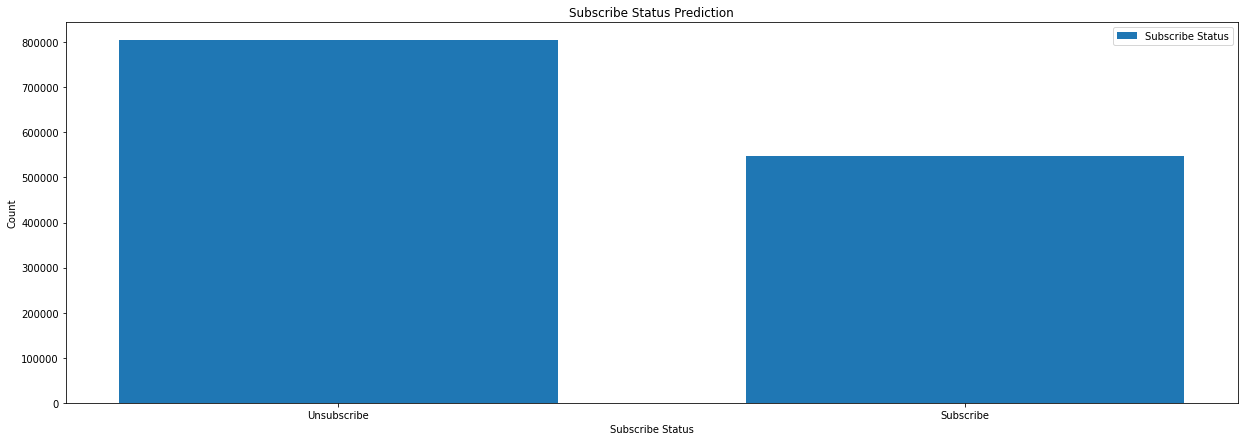

In [ ]:
target_names = ["Unsubscribe", "Subscribe"]

fig = plt.figure(figsize = (21, 7))
X_axis = np.arange(len(target_names))
plt.bar(target_names, [list(y).count(0), list(y).count(1)], width = 0.7, label = "Subscribe Status")

plt.xticks(X_axis, target_names)
plt.xlabel("Subscribe Status")
plt.ylabel("Count")
plt.title("Subscribe Status Prediction")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

training_set, test_set, training_label, test_label = train_test_split(data, y,
                                                                      test_size = 0.2,
                                                                      random_state = None,
                                                                      stratify = temp)

sc = StandardScaler()
training_set[:, :, 0] = sc.fit_transform(training_set[:, :, 0])
test_set[:, :, 0] = sc.transform(test_set[:, :, 0])
joblib.dump(sc, "scaler.gz")
sc = joblib.load("scaler.gz")

X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], data.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], data.shape[2]))

y_late_train = X_train[:, 0, 6].astype(int)
y_late_test = X_test[:, 0, 6].astype(int)

X_train4 = X_train[:, :, 4]
X_test4 = X_test[:, :, 4]

X_train3 = X_train[:, :, 3]
X_test3 = X_test[:, :, 3]

X_train2 = X_train[:, 0, 5]
list_a = []
for i in range(X_train2.shape[0]):
    list_a.append(list(X_train2[i]))
X_train2 = np.array(list_a)
X_test2 = X_test[:, 0, 5]
list_b = []
for i in range(X_test2.shape[0]):
    list_b.append(list(X_test2[i]))
X_test2 = np.array(list_b)

X_train = X_train[:, :, 0:3].astype(float)
X_test = X_test[:, :, 0:3].astype(float)

In [ ]:
X_train2 = encoder.transform(X_train2)
X_test2 = encoder.transform(X_test2)

In [ ]:
!pip install pyts
from pyts.classification import TimeSeriesForest

model2 = TimeSeriesForest(random_state = None)
model2.fit(np.concatenate((np.concatenate((np.concatenate((X_train[:, :, 0], X_train3), axis = 1), X_train[:, :, 1]), axis = 1), X_train4), axis = 1),
           y_late_train)

X_train_razi = model2.predict(np.concatenate((np.concatenate((np.concatenate((X_train[:, :, 0], X_train3), axis = 1), X_train[:, :, 1]), axis = 1), X_train4), axis = 1))
X_test_razi = model2.predict(np.concatenate((np.concatenate((np.concatenate((X_test[:, :, 0], X_test3), axis = 1), X_test[:, :, 1]), axis = 1), X_test4), axis = 1))

In [ ]:
# define two sets of inputs
inputA = tf.keras.layers.Input(shape = (X_train.shape[1], 3))
inputB = tf.keras.layers.Input(shape = (X_train2.shape[1]))
inputC = tf.keras.layers.Input(shape = (1))

# the first branch operates on the first input
x_layer = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(inputA)
x_layer = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x_layer)
x_layer = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x_layer)
x_layer = tf.keras.layers.LSTM(units = 8, dropout = 0.2)(x_layer)
x_layer = tf.keras.Model(inputs = inputA, outputs = x_layer)

# the second branch opreates on the second input
y_layer = tf.keras.layers.Dense(128, activation = "relu")(inputB)
y_layer = tf.keras.layers.Dense(32, activation = "relu")(y_layer)
y_layer = tf.keras.layers.Dense(8, activation = "relu")(y_layer)
y_layer = tf.keras.Model(inputs = inputB, outputs = y_layer)

# the third branch opreates on the third input
z_layer = tf.keras.layers.Dense(1, activation = "relu")(inputC)
z_layer = tf.keras.Model(inputs = inputC, outputs = z_layer)

# combine the output of the two branches
#combined = tf.keras.layers.concatenate([x_layer.output])
#combined = tf.keras.layers.concatenate([x_layer.output, y_layer.output])
combined = tf.keras.layers.concatenate([x_layer.output, y_layer.output, z_layer.output])

final = tf.keras.layers.Dense(128, activation = "relu")(combined)
final = tf.keras.layers.Dense(32, activation = "relu")(final)
final = tf.keras.layers.Dense(1, activation = "sigmoid")(final)
#model = tf.keras.Model(inputs = [x_layer.input], outputs = final)
#model = tf.keras.Model(inputs = [x_layer.input, y_layer.input], outputs = final)
model = tf.keras.Model(inputs = [x_layer.input, y_layer.input, z_layer.input], outputs = final)

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 8)        384         ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 72)]         0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 10, 8)        544         ['lstm[0][0]']                   
                                                                                            

In [ ]:
'''
result = model.fit([X_train], y_train,
                   validation_data = ([X_test], y_test),
                   epochs = 10,
                   batch_size = 32)

result = model.fit([X_train, X_train2], y_train,
                   validation_data = ([X_test, X_test2], y_test),
                   epochs = 10,
                   batch_size = 32)
'''
result = model.fit([X_train, X_train2, X_train_razi], y_train,
                   validation_data = ([X_test, X_test2, X_test_razi], y_test),
                   epochs = 10,
                   batch_size = 32)

Epoch 1/10
32340/33800 [===========================>..] - ETA: 20s - loss: 0.1761 - accuracy: 0.9184

In [ ]:
# Plotting train_loss vs val_loss
plt.figure(figsize = (10, 5))
plt.plot(result.history["loss"], label = "loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()

# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize = (10, 5))
plt.plot(result.history["accuracy"], label = "accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend(loc = "upper left")

In [ ]:
# COPY MODEL YG ADA DI DRIVE BUAT DIREKAP

pickle.dump(model2, open('model_razi','wb'))
model.save("model_lstm.h5")
import shutil

shutil.copyfile(os.getcwd() + "/model_razi",
                os.getcwd() + "/drive/MyDrive/model_razi")
shutil.copyfile(os.getcwd() + "/model_lstm.h5",
                os.getcwd() + "/drive/MyDrive/model_lstm.h5")

# Evaluation

In [ ]:
model = tf.keras.models.load_model(os.getcwd() + "/drive/MyDrive/model_lstm.h5")
model2 = pickle.load(open(os.getcwd() + "/drive/MyDrive/model_razi", "rb"))

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

paket_class = pickle.load(open("encode_paket","rb"))
channel_class = pickle.load(open('encode_channel','rb'))
#model = tf.keras.models.load_model("model_lstm.h5")
#model2 = pickle.load(open("model_razi","rb"))

'''
def encode_paket(x):
    paket = np.zeros(94)
    if x in list(paket_class[0]):
        paket[list(paket_class[0]).index(x)] = 1
    else:
        paket[0] = 1
    return np.array([paket.astype(int)])
'''
def encode_amountTotal(x):
    amountTotal = float(str(x).replace(".", "").replace(",", "."))
    if math.isnan(amountTotal):
        amountTotal = 0
    elif amountTotal < 0:
        amountTotal = -1 * amountTotal
    return amountTotal

def encode_status(x):
    status = x
    if status == "ZERO BILLING":
        status = 0
    elif status == "UNPAID":
        status = 1
    elif status == "PAID":
        status = 2
    else:
        status = 0
    return status

def encode_paymentDate(x):
    paymentDate = x
    if math.isnan(paymentDate):
        paymentDate = 0
    paymentDate = int(float(paymentDate))
    paymentDate = int(str(paymentDate)[-2:])
    return paymentDate

'''
def encode_paket(x):
    paket = np.zeros(94)
    if x in list(paket_class[0]):
        paket[list(paket_class[0]).index(x)] = 1
    else:
        paket[0] = 1
    return np.array([paket.astype(int)])
'''
def encode_paket(x):
    paket = paket_class.transform([[x]])
    return paket[0]

def encode_late(x):
    paymentDate = x
    if paymentDate == 0:
     	  paymentDate = 0
    elif paymentDate > 0 and paymentDate < 21:
	      paymentDate = 1
    else:
	      paymentDate = 2
    return paymentDate

def scaling_amountTotal(billing_11_amountTotal, billing_10_amountTotal, billing_9_amountTotal, billing_8_amountTotal, billing_7_amountTotal, billing_6_amountTotal, billing_5_amountTotal, billing_4_amountTotal, billing_3_amountTotal, billing_2_amountTotal):
    x = np.array([billing_11_amountTotal,
                billing_10_amountTotal,
                billing_9_amountTotal,
                billing_8_amountTotal,
                billing_7_amountTotal,
                billing_6_amountTotal,
                billing_5_amountTotal,
                billing_4_amountTotal,
                billing_3_amountTotal,
		billing_2_amountTotal])
    sc = joblib.load("scaler.gz")
    return sc.transform(np.reshape(x, (1, -1)))

def encode_channel(x):
    channel = channel_class.transform([x])
    return channel[0]

sc = joblib.load("scaler.gz")

test = np.array([[0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0],
                 [275000, 2, 4],
                 [300000, 2, 9],
                 [275000, 2, 9],
                 [0, 1, 0]])
test = test.astype(float)
test[:, 0] = np.reshape(sc.transform(np.reshape(test[:, 0], (1, -1))), -1)

arr = [test[:, 0][0],
       test[:, 0][1],
       test[:, 0][2],
       test[:, 0][3],
       test[:, 0][4],
       test[:, 0][5],
       test[:, 0][6],
       test[:, 0][7],
       test[:, 0][8],
       test[:, 0][9],
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       encode_channel("FINNET BANK - BANK CENTRAL ASIA"),
       test[:, 2][0],
       test[:, 2][1],
       test[:, 2][2],
       test[:, 2][3],
       test[:, 2][4],
       test[:, 2][5],
       test[:, 2][6],
       test[:, 2][7],
       test[:, 2][8],
       test[:, 2][9],
       encode_late(test[:, 2][0]),
       encode_late(test[:, 2][1]),
       encode_late(test[:, 2][2]),
       encode_late(test[:, 2][3]),
       encode_late(test[:, 2][4]),
       encode_late(test[:, 2][5]),
       encode_late(test[:, 2][6]),
       encode_late(test[:, 2][7]),
       encode_late(test[:, 2][8]),
       encode_late(test[:, 2][9])]
'''
test2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,])
'''
test2 = encode_paket("INETF10M")
#test3 = np.array([0])
test3 = model2.predict(np.array([arr]))

print(test)
print(test2)
print(test3)
print("Predict : {}".format(model.predict([np.reshape(test, (1, test.shape[0], test.shape[1])),
                                           np.reshape(test2, (1, test2.shape[0])),
                                           test3]))) # Predict

In [ ]:
# COPY OUTPUT CONFUSION MATRIX 2 BUAT DIREKAP

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import clear_output
from sklearn import preprocessing

df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
for month in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "ZERO BILLING" else (1 if x == "UNPAID" else 2))

le = preprocessing.LabelEncoder()
le.fit(np.unique(df_temp[["billing_11_channel",
                          "billing_10_channel",
                          "billing_9_channel",
                          "billing_8_channel",
                          "billing_7_channel",
                          "billing_6_channel",
                          "billing_5_channel",
                          "billing_4_channel",
                          "billing_3_channel",
                          "billing_2_channel",
                          "billing_1_channel",]].values))
#pickle.dump(le, open('encode_channel','wb'))
for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_channel".format(month)]] = le.transform(df_temp["billing_{}_channel".format(month)])
    df_temp["billing_{}_late".format(month)] = df_temp["billing_{}_paymentDate".format(month)].apply(lambda x: 0 if x == 0 else (1 if x > 0 and x < 21 else 2)).values

num_class = 0
for i in ["SUBSCRIBE", "UNSUBSCRIBE"]:
    for j in range(3):
        for k in range(3):
            df_temp.loc[(df_temp["subscribe_status"] == i) & (df_temp["billing_2_status"] == j) & (df_temp["billing_3_status"] == k), "class"] = num_class
            num_class += 1

df_temp = df_temp[["billing_11_amountTotal",
                   "billing_10_amountTotal",
                   "billing_9_amountTotal",
                   "billing_8_amountTotal",
                   "billing_7_amountTotal",
                   "billing_6_amountTotal",
                   "billing_5_amountTotal",
                   "billing_4_amountTotal",
                   "billing_3_amountTotal",
                   "billing_2_amountTotal",
                   "billing_11_status",
                   "billing_10_status",
                   "billing_9_status",
                   "billing_8_status",
                   "billing_7_status",
                   "billing_6_status",
                   "billing_5_status",
                   "billing_4_status",
                   "billing_3_status",
                   "billing_2_status",
                   "billing_11_paymentDate",
                   "billing_10_paymentDate",
                   "billing_9_paymentDate",
                   "billing_8_paymentDate",
                   "billing_7_paymentDate",
                   "billing_6_paymentDate",
                   "billing_5_paymentDate",
                   "billing_4_paymentDate",
                   "billing_3_paymentDate",
                   "billing_2_paymentDate",
                   "billing_11_channel",
                   "billing_10_channel",
                   "billing_9_channel",
                   "billing_8_channel",
                   "billing_7_channel",
                   "billing_6_channel",
                   "billing_5_channel",
                   "billing_4_channel",
                   "billing_3_channel",
                   "billing_2_channel",
                   "billing_11_late",
                   "billing_10_late",
                   "billing_9_late",
                   "billing_8_late",
                   "billing_7_late",
                   "billing_6_late",
                   "billing_5_late",
                   "billing_4_late",
                   "billing_3_late",
                   "billing_2_late",
                   "gladius.paketradius",
                   "subscribe_status",
                   "class",
                   "billing_1_late"]]

data = df_temp.values

dat1 = data[:, 0:10]
dat2 = data[:, 10:20]
dat3 = data[:, 20:30]
dat4 = data[:, 30:40]
dat5 = data[:, 40:50]
dat6 = np.array([np.array([i]) for i in data[:, 50]])
y = data[:, 51]
y_late = data[:, -1]

encoder = OneHotEncoder(sparse = False)
dat6 = encoder.fit_transform(dat6)
#pickle.dump(encoder, open('encode_paket','wb'))
y = np.where(y == "UNSUBSCRIBE", 0, np.where(y == "SUBSCRIBE", 1, y))

data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        c.append(dat3[i][j])
        c.append(dat4[i][j])
        c.append(dat5[i][j])
        c.append(dat6[i])
        c.append(y_late[i])
        c.append(y[i])
        b.append(c)
    data.append(b)
data = np.array(data)

data_paket = data[:, 0, 5]
list_a = []
for i in range(data_paket.shape[0]):
    list_a.append(list(data_paket[i]))
data_paket = np.array(list_a)

#Prediction:
target_names = ["UNSUBSCRIBE", "SUBSCRIBE"]

data_razi = model2.predict(np.concatenate((np.concatenate((np.concatenate((data[:, :, 0], data[:, :, 4]), axis = 1), data[:, :, 1]), axis = 1), data[:, :, 6]), axis = 1))
predict = np.reshape(np.round(model.predict([data[:, :, 0:3].astype(float), data_paket, data_razi])).astype(int), (data[:, :, 0:3].shape[0]))

print("Confusion Matrix")
cm = confusion_matrix(y.astype(int), predict)
print(cm)

# show the accuracy, sensitivity, and specificity
total = sum(sum(cm))
acc = (cm[0][0] + cm[1][1]) / total
print("acc: {:.4f}".format(acc))
sensitivity = cm[0][0] / (cm[0][0] + cm[0][1])
print("{} sensitivity: {:.4f}".format(target_names[0], sensitivity))
sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
print("{} sensitivity: {:.4f}".format(target_names[1], sensitivity))

print("Classification Report")
print(classification_report(y.astype(int), predict, target_names = target_names, digits = 4))

In [ ]:
dict_predict = {"true_0": 0, "true_1": 0, "true_2": 0, "true_3": 0, "true_4": 0, "true_5": 0, "true_6": 0, "true_7": 0, "true_8": 0, "true_9": 0, "true_10": 0, "true_11": 0, "true_12": 0, "true_13": 0, "true_14": 0, "true_15": 0, "true_16": 0, "true_17": 0,
                "false_0": 0, "false_1": 0, "false_2": 0, "false_3": 0, "false_4": 0, "false_5": 0, "false_6": 0, "false_7": 0, "false_8": 0, "false_9": 0, "false_10": 0, "false_11": 0, "false_12": 0, "false_13": 0, "false_14": 0, "false_15": 0, "false_16": 0, "false_17": 0}
y = y.astype(int)
for i in range(df_temp.count()[0]):
    class_i = df_temp[["class"]].iloc[i][0]
    if predict[i] == y[i]:
        if not "true_{}".format(int(class_i)) in dict_predict:
            dict_predict["true_{}".format(int(class_i))] = 1
        else:
            dict_predict["true_{}".format(int(class_i))] = dict_predict["true_{}".format(int(class_i))] + 1
    else:
        if not "false_{}".format(int(class_i)) in dict_predict:
            dict_predict["false_{}".format(int(class_i))] = 1
        else:
            dict_predict["false_{}".format(int(class_i))] = dict_predict["false_{}".format(int(class_i))] + 1
    clear_output(wait = True)
    print("Progress : {:.2%}".format(i/df_temp.count()[0]))

In [ ]:
# COPY OUTPUT DISTRIBUSI PREDIKSI BUAT DIREKAP

print("SUBSCRIBE->ZERO BILLING->ZERO BILLING", "TRUE :", dict_predict["true_0"], "FALSE :", dict_predict["false_0"], "PERCENTAGE :", (dict_predict["true_0"]/(dict_predict["true_0"] + dict_predict["false_0"])))
print("SUBSCRIBE->ZERO BILLING->UNPAID", "TRUE :", dict_predict["true_1"], "FALSE :", dict_predict["false_1"], "PERCENTAGE :", (dict_predict["true_1"]/(dict_predict["true_1"] + dict_predict["false_1"])))
print("SUBSCRIBE->ZERO BILLING->PAID", "TRUE :", dict_predict["true_2"], "FALSE :", dict_predict["false_2"], "PERCENTAGE :", (dict_predict["true_2"]/(dict_predict["true_2"] + dict_predict["false_2"])))
print("/n")
print("SUBSCRIBE->UNPAID->ZERO BILLING", "TRUE :", dict_predict["true_3"], "FALSE :", dict_predict["false_3"], "PERCENTAGE :", (dict_predict["true_3"]/(dict_predict["true_3"] + dict_predict["false_3"])))
print("SUBSCRIBE->UNPAID->UNPAID", "TRUE :", dict_predict["true_4"], "FALSE :", dict_predict["false_4"], "PERCENTAGE :", (dict_predict["true_4"]/(dict_predict["true_4"] + dict_predict["false_4"])))
print("SUBSCRIBE->UNPAID->PAID", "TRUE :", dict_predict["true_5"], "FALSE :", dict_predict["false_5"], "PERCENTAGE :", (dict_predict["true_5"]/(dict_predict["true_5"] + dict_predict["false_5"])))
print("/n")
print("SUBSCRIBE->PAID->ZERO BILLING", "TRUE :", dict_predict["true_6"], "FALSE :", dict_predict["false_6"], "PERCENTAGE :", (dict_predict["true_6"]/(dict_predict["true_6"] + dict_predict["false_6"])))
print("SUBSCRIBE->PAID->UNPAID", "TRUE :", dict_predict["true_7"], "FALSE :", dict_predict["false_7"], "PERCENTAGE :", (dict_predict["true_7"]/(dict_predict["true_7"] + dict_predict["false_7"])))
print("SUBSCRIBE->PAID->PAID", "TRUE :", dict_predict["true_8"], "FALSE :", dict_predict["false_8"], "PERCENTAGE :", (dict_predict["true_8"]/(dict_predict["true_8"] + dict_predict["false_8"])))

print("/n/n")
print("UNSUBSCRIBE->ZERO BILLING->ZERO BILLING", "TRUE :", dict_predict["true_9"], "FALSE :", dict_predict["false_9"], "PERCENTAGE :", (dict_predict["true_9"]/(dict_predict["true_9"] + dict_predict["false_9"])))
print("UNSUBSCRIBE->ZERO BILLING->UNPAID", "TRUE :", dict_predict["true_10"], "FALSE :", dict_predict["false_10"], "PERCENTAGE :", (dict_predict["true_10"]/(dict_predict["true_10"] + dict_predict["false_10"])))
print("UNSUBSCRIBE->ZERO BILLING->PAID", "TRUE :", dict_predict["true_11"], "FALSE :", dict_predict["false_11"], "PERCENTAGE :", (dict_predict["true_11"]/(dict_predict["true_11"] + dict_predict["false_11"])))
print("/n")
print("UNSUBSCRIBE->UNPAID->ZERO BILLING", "TRUE :", dict_predict["true_12"], "FALSE :", dict_predict["false_12"], "PERCENTAGE :", (dict_predict["true_12"]/(dict_predict["true_12"] + dict_predict["false_12"])))
print("UNSUBSCRIBE->UNPAID->UNPAID", "TRUE :", dict_predict["true_13"], "FALSE :", dict_predict["false_13"], "PERCENTAGE :", (dict_predict["true_13"]/(dict_predict["true_13"] + dict_predict["false_13"])))
print("UNSUBSCRIBE->UNPAID->PAID", "TRUE :", dict_predict["true_14"], "FALSE :", dict_predict["false_14"], "PERCENTAGE :", (dict_predict["true_14"]/(dict_predict["true_14"] + dict_predict["false_14"])))
print("/n")
print("UNSUBSCRIBE->PAID->ZERO BILLING", "TRUE :", dict_predict["true_15"], "FALSE :", dict_predict["false_15"], "PERCENTAGE :", (dict_predict["true_15"]/(dict_predict["true_15"] + dict_predict["false_15"])))
#print("UNSUBSCRIBE->PAID->UNPAID", "TRUE :", dict_predict["true_16"], "FALSE :", dict_predict["false_16"], "PERCENTAGE :", (dict_predict["true_16"]/(dict_predict["true_16"] + dict_predict["false_16"])))
print("UNSUBSCRIBE->PAID->UNPAID", "TRUE :", dict_predict["true_16"], "FALSE :", dict_predict["false_16"])
print("UNSUBSCRIBE->PAID->PAID", "TRUE :", dict_predict["true_17"], "FALSE :", dict_predict["false_17"], "PERCENTAGE :", (dict_predict["true_17"]/(dict_predict["true_17"] + dict_predict["false_17"])))